In [1]:
import operator
import numpy as np
import os
from csv import DictReader

datoteke = os.listdir("podatki/")
barva_datum = []
for dat in datoteke:
    if "Podatki" in dat and "2020" not in dat:
        neki = DictReader(open('podatki/' + dat, 'rt', encoding='ANSI'), delimiter=';')
        for i in neki:
            barva_datum.append((i["2A-Datum prve registracije vozila v SLO"], i["R-Barva vozila (oznaka)"], dat[8:-4], i["Status vozila (opis)"]))

barva_datum = np.array(barva_datum)

In [11]:
barva_datum[0,:]
datumi_barve = dict()
for i in barva_datum:
    if i[3] != "odjavljeno":
        if i[2] not in datumi_barve:
            datumi_barve[i[2]] = []
        datumi_barve[i[2]].append(i[1])

In [12]:
from collections import Counter
stevilo_barv = []
for key in datumi_barve:
    barve = datumi_barve[key]
    najpogostejsa_barva = [[word, word_count] for word, word_count in Counter(barve).most_common(1)]
    stevilo_barv.append((najpogostejsa_barva, key, len(barve)))

In [13]:
stevilo_barv

[([['S0M', 1384]], '012015', 8269),
 ([['S0M', 1506]], '012016', 9613),
 ([['S0M', 1750]], '012017', 9639),
 ([['S0M', 2155]], '012018', 11358),
 ([['S0M', 2102]], '012019', 10798),
 ([['S0M', 1220]], '022015', 7430),
 ([['S0M', 1343]], '022016', 8408),
 ([['S0M', 1662]], '022017', 9127),
 ([['S0M', 1729]], '022018', 9032),
 ([['S0M', 1892]], '022019', 10000),
 ([['S0M', 1534]], '032015', 10678),
 ([['S0M', 1574]], '032016', 10990),
 ([['S0M', 2101]], '032017', 12833),
 ([['S0M', 2417]], '032018', 13195),
 ([['S0M', 2441]], '032019', 12969),
 ([['S0M', 1564]], '042015', 10301),
 ([['S0M', 1639]], '042016', 10354),
 ([['S0M', 2399]], '042017', 17636),
 ([['S0M', 2315]], '042018', 12728),
 ([['S0M', 2286]], '042019', 12177),
 ([['S0M', 1549]], '052015', 9797),
 ([['S0M', 1703]], '052016', 10565),
 ([['S0M', 2443]], '052017', 16465),
 ([['S0M', 2438]], '052018', 13699),
 ([['S0M', 2273]], '052019', 12694),
 ([['S0M', 1582]], '062015', 9621),
 ([['S0M', 1772]], '062016', 10834),
 ([['S0M',

In [14]:
stevilo_barv[0][0][0][1]

1384

In [15]:
po_polletjih = dict()
for vrstica in stevilo_barv:
    if int(vrstica[1][:2]) < 7:
        if int(vrstica[1][-2:]) == 15:
            if "prvo2015" not in po_polletjih:
                po_polletjih["prvo2015"] = [0,0]
            po_polletjih["prvo2015"][0] += vrstica[0][0][1]
            po_polletjih["prvo2015"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 16:
            if "prvo2016" not in po_polletjih:
                po_polletjih["prvo2016"] = [0,0]
            po_polletjih["prvo2016"][0] += vrstica[0][0][1]
            po_polletjih["prvo2016"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 17:
            if "prvo2017" not in po_polletjih:
                po_polletjih["prvo2017"] = [0,0]
            po_polletjih["prvo2017"][0] += vrstica[0][0][1]
            po_polletjih["prvo2017"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 18:
            if "prvo2018" not in po_polletjih:
                po_polletjih["prvo2018"] = [0,0]
            po_polletjih["prvo2018"][0] += vrstica[0][0][1]
            po_polletjih["prvo2018"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 19:
            if "prvo2019" not in po_polletjih:
                po_polletjih["prvo2019"] = [0,0]
            po_polletjih["prvo2019"][0] += vrstica[0][0][1]
            po_polletjih["prvo2019"][1] += vrstica[2]
    if int(vrstica[1][:2]) > 6:
        if int(vrstica[1][-2:]) == 15:
            if "drugo2015" not in po_polletjih:
                po_polletjih["drugo2015"] = [0,0]
            po_polletjih["drugo2015"][0] += vrstica[0][0][1]
            po_polletjih["drugo2015"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 16:
            if "drugo2016" not in po_polletjih:
                po_polletjih["drugo2016"] = [0,0]
            po_polletjih["drugo2016"][0] += vrstica[0][0][1]
            po_polletjih["drugo2016"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 17:
            if "drugo2017" not in po_polletjih:
                po_polletjih["drugo2017"] = [0,0]
            po_polletjih["drugo2017"][0] += vrstica[0][0][1]
            po_polletjih["drugo2017"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 18:
            if "drugo2018" not in po_polletjih:
                po_polletjih["drugo2018"] = [0,0]
            po_polletjih["drugo2018"][0] += vrstica[0][0][1]
            po_polletjih["drugo2018"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 19:
            if "drugo2019" not in po_polletjih:
                po_polletjih["drugo2019"] = [0,0]
            po_polletjih["drugo2019"][0] += vrstica[0][0][1]
            po_polletjih["drugo2019"][1] += vrstica[2]
po_polletjih

{'prvo2015': [8833, 56096],
 'prvo2016': [9537, 60764],
 'prvo2017': [12860, 80730],
 'prvo2018': [13582, 73371],
 'prvo2019': [13136, 70360],
 'drugo2015': [8210, 50249],
 'drugo2016': [9381, 51846],
 'drugo2017': [10891, 58829],
 'drugo2018': [11919, 60525],
 'drugo2019': [11238, 57965]}

In [16]:
for i in po_polletjih:
    procent_barve = (po_polletjih[i][0]/po_polletjih[i][1]) * 100
    procet_ostalega = 100 - procent_barve
    po_polletjih[i] = [procent_barve, procet_ostalega]
po_polletjih

{'prvo2015': [15.746220764403878, 84.25377923559613],
 'prvo2016': [15.695148443157134, 84.30485155684286],
 'prvo2017': [15.929642016598539, 84.07035798340146],
 'prvo2018': [18.511400962233036, 81.48859903776696],
 'prvo2019': [18.669698692438885, 81.33030130756111],
 'drugo2015': [16.33863360464885, 83.66136639535115],
 'drugo2016': [18.09397060525402, 81.90602939474599],
 'drugo2017': [18.51297829301875, 81.48702170698125],
 'drugo2018': [19.69268897149938, 80.30731102850062],
 'drugo2019': [19.387561459501423, 80.61243854049857]}

In [17]:
koncano = [po_polletjih["prvo2015"], po_polletjih["drugo2015"], po_polletjih["prvo2016"], po_polletjih["drugo2016"], po_polletjih["prvo2017"], po_polletjih["drugo2017"], po_polletjih["prvo2018"], po_polletjih["drugo2018"], po_polletjih["prvo2019"], po_polletjih["drugo2019"]]
koncano = np.array(koncano)

In [18]:
import matplotlib.pyplot as plt
n_bins=10
colors = ['Bela', 'Ostale barve']
imena = ["prvo 2015", "drugo 2015", "prvo 2016", "drugo 2016", "prvo 2017", "drugo 2017", "prvo 2018", "drugo 2018", "prvo 2019", "drugo2019"]

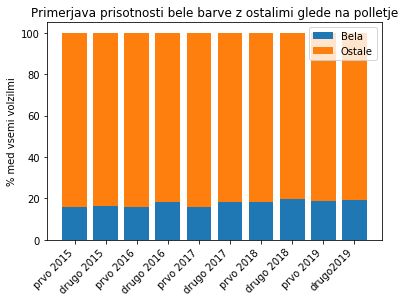

In [19]:
bela = koncano[:,0]
ostalo = koncano[:,1]
fig, ax = plt.subplots()
ax.bar(imena, bela, label='Bela')
ax.bar(imena, ostalo, bottom=bela,
       label='Ostale')

ax.set_ylabel('% med vsemi volzilmi')
ax.set_title('Primerjava prisotnosti bele barve z ostalimi glede na polletje')
ax.legend()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()